<a href="https://colab.research.google.com/github/alanfpv95/Data-Science/blob/main/DS_C3_SC1_Alan_Pi%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [3]:
happiness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Visualización de datos con Python/Happiness_report.csv')

2.  A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [4]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


3. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(6.595, 0, 'MEX')

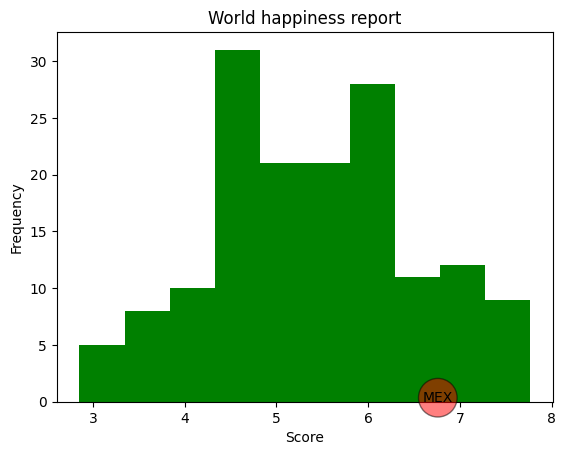

In [5]:
plt.hist(happiness['Score'], color="green")
plt.title('World happiness report')
plt.xlabel("Score")
plt.ylabel("Frequency")

#Ubicar el valor de méxico en la gráfica
value = mexico['Score'].values[0]
# Marcador de círculo rojo para indicar México donde está México en happines
props_bbox = {'boxstyle': 'circle',
'facecolor': 'red',
'alpha': 0.5}
plt.text(value,0,'MEX', bbox=props_bbox)

5. Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación. Ejemplo:

Text(1.1, 0.861, 'Mex')

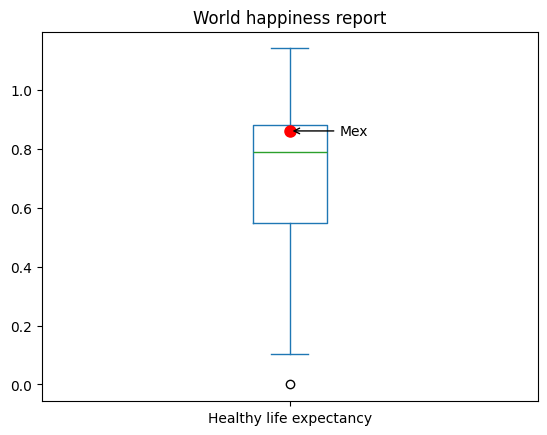

In [62]:
happiness['Healthy life expectancy'].plot(kind='box')
plt.title('World happiness report')

# Ubicar el valor de México
value = mexico['Healthy life expectancy'].values[0]

# Punto rojo
plt.plot(1, value, 'ro', markersize=8)  # 'ro' creates a red circle marker

# Annotate para flecha
plt.annotate('Mex', xy=(1, value), xytext=(1.1, value), arrowprops=dict(arrowstyle="->", color='black'), va='center')

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

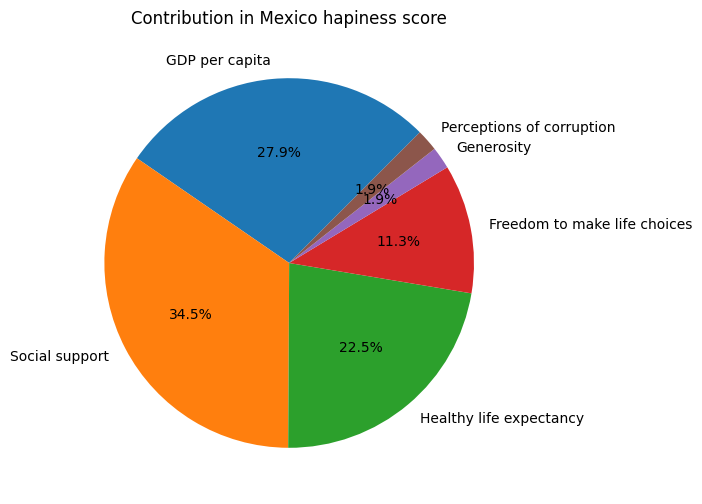

In [63]:
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
values_mexico = mexico[factors].values[0]

plt.figure(figsize=(6,6))
plt.pie(values_mexico, labels=factors, autopct='%1.1f%%', startangle=45)
plt.title('Contribution in Mexico hapiness score')
#plt.axis('equal')
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

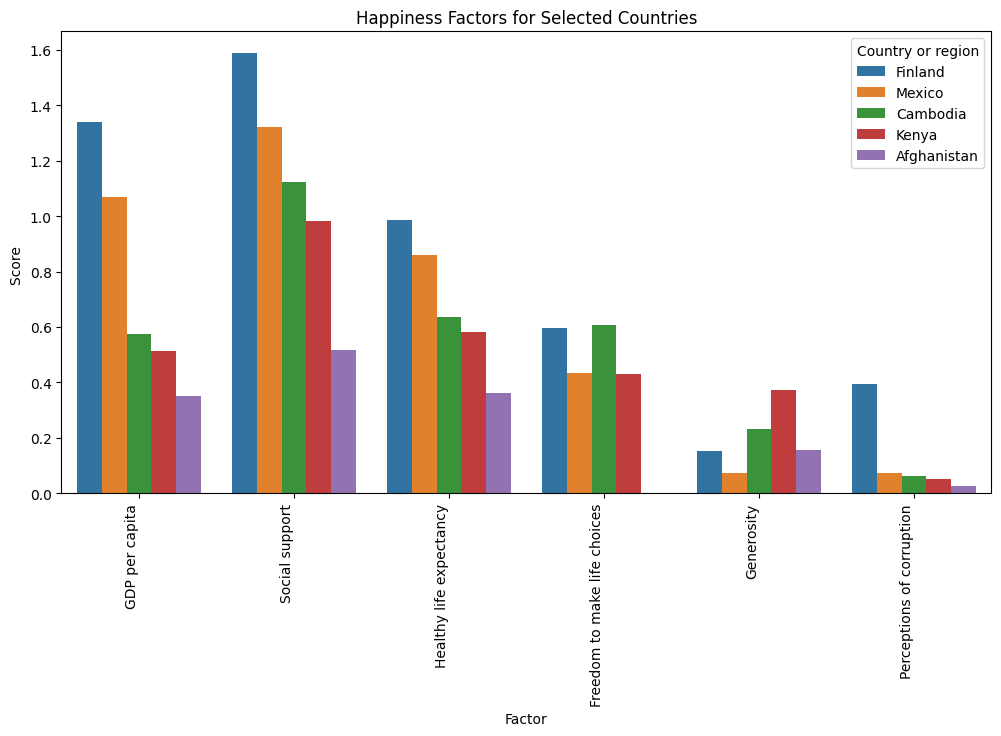

In [64]:
countries = ['Finland', 'Afghanistan', 'Mexico', 'Cambodia', 'Kenya']
filtered_df = happiness[happiness['Country or region'].isin(countries)]

melted_df = pd.melt(filtered_df, id_vars=['Country or region'], value_vars=factors, var_name='Factor', value_name='Score ')


plt.figure(figsize=(12, 6))
sns.barplot(x='Factor', y='Score ', hue='Country or region', data=melted_df)
plt.title('Happiness Factors for Selected Countries')
plt.xticks(rotation=90, ha='right')
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

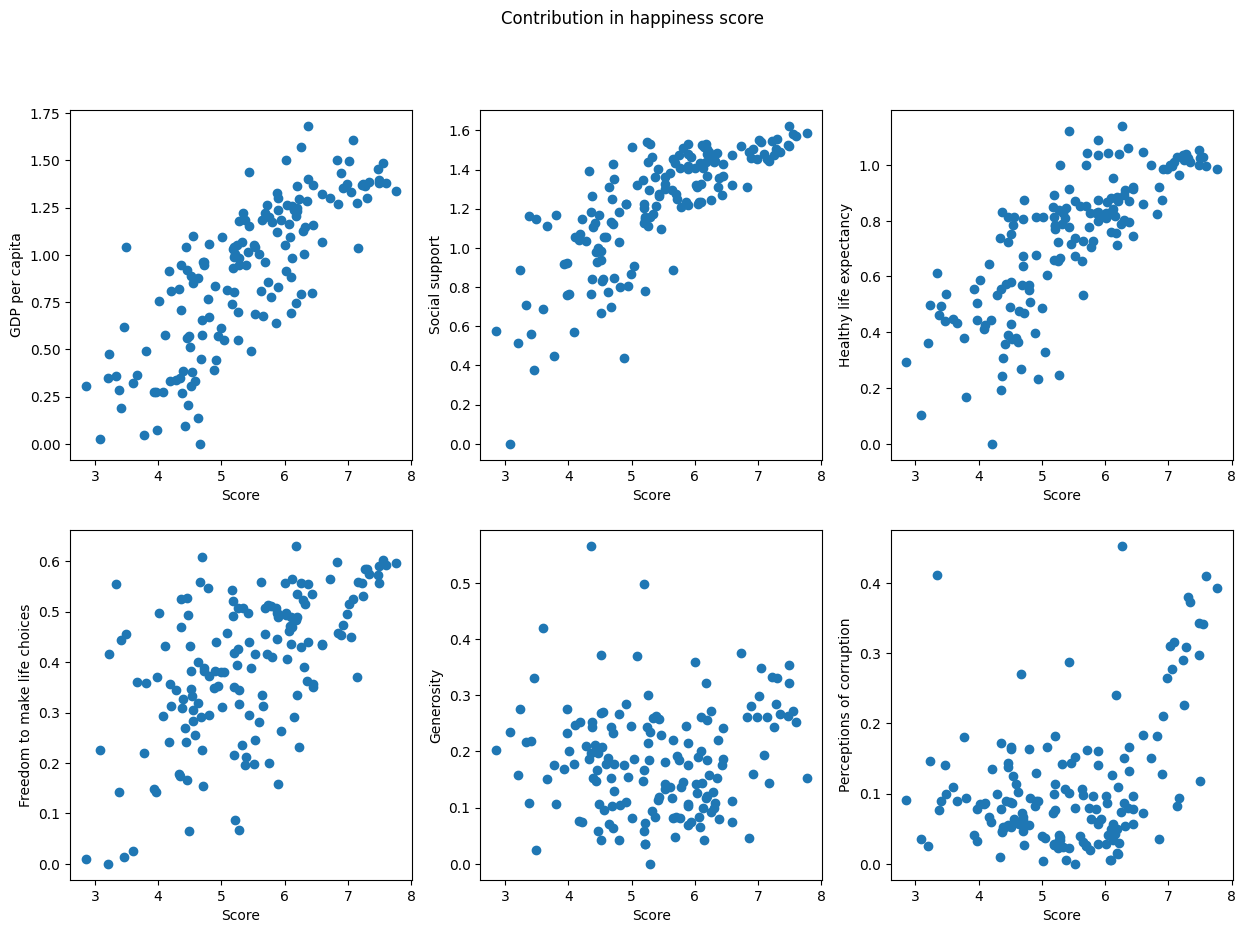

In [69]:
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Itera sobre los factores y crea un scatter plot para cada uno
for i, factor in enumerate(factors):
    row = i // 3  # Calcula la fila del subplot
    col = i % 3   # Calcula la columna del subplot
    axes[row, col].scatter(happiness['Score'], happiness[factor])
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel(factor)

plt.suptitle('Contribution in happiness score')
plt.show()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

In [38]:
happiness.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

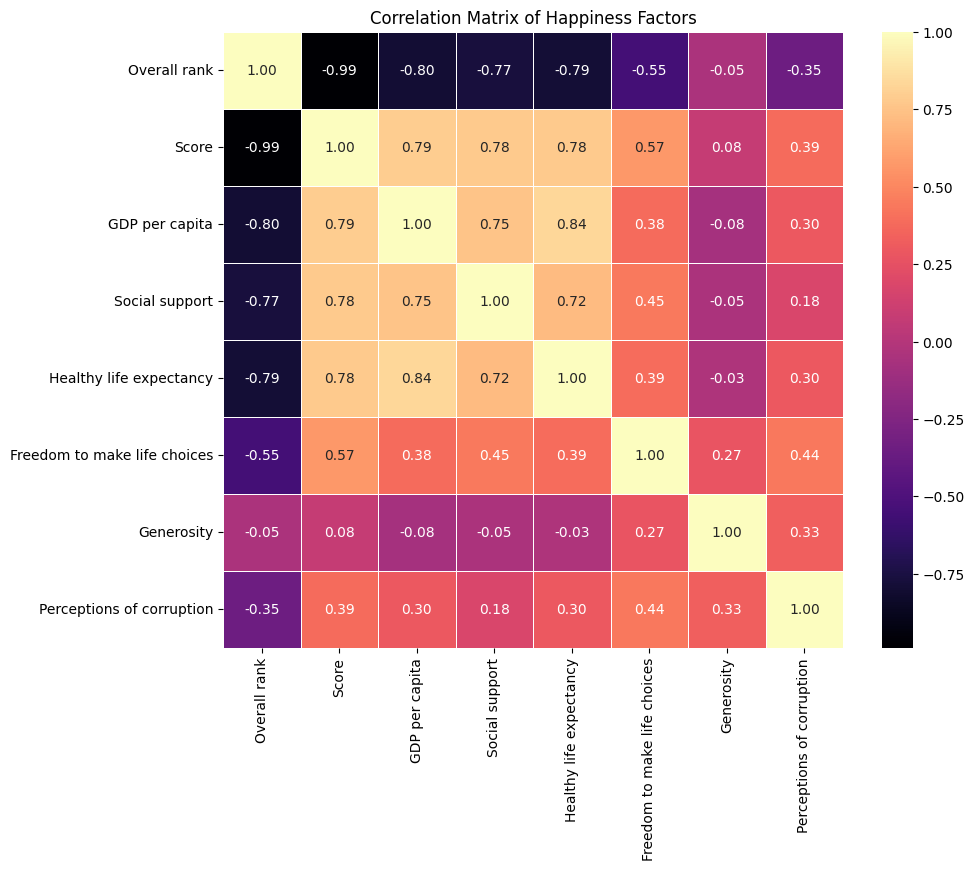

In [46]:
cols = ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data = happiness[cols]

# Calcula la matriz de correlación
correlation_matrix = data.corr()

# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Happiness Factors')
plt.show()

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

<ipython-input-61-68aa32df22c6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Score', data=average_happiness_by_region, palette='husl')


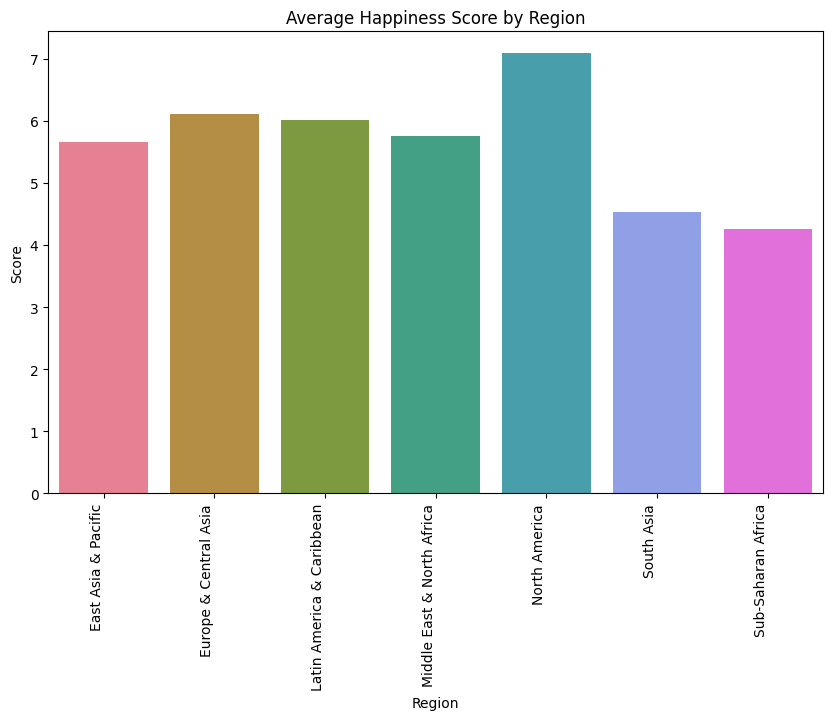

In [61]:
metadata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Visualización de datos con Python/F_Metadata.csv')
merged_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName', how='left')
average_happiness_by_region = merged_df.groupby('Region')['Score'].mean().reset_index()
#average_happiness_by_region

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Score', data=average_happiness_by_region, palette='husl')
plt.title('Average Happiness Score by Region')
plt.xticks(rotation=90, ha='right')
plt.show()